# Human Resource Analytics

Dataset : HR Analytics

The dataset was taken from Kaggle

Main objectives of this project : To predict whether an employee would leave or remain in the company

We would like to do this project by the following structure: 
    1. Obtaining Data
    2. Scrubbing Data
    3. Exploratory Analysis
    4. Model Comparison
    5. Application

# Part 1: Obtaining the Data

In [1]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
#Read the csv file and store our dataset into a dataframe called "df"
df = pd.read_csv('HR_comma_sep.csv')

# Part 2: Scrubbing the Data

In [3]:
# Check if there are any missing values in our data set
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

There is no missing values in our dataset.

In [4]:
# Quick overview of our dataset
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### We need to make sure that our column names are easy to read and ensure that we convert categorical data to numeric values (if necessary) so that it is easier and better for us to analyse.

#### We would like to change some of the Categorical Values to Numerical Values so we can better make use of the data.

In [5]:
# Replacing the salary data with numerical values
df['salary'].replace(['low', 'medium', 'high'], [0, 1, 2], inplace = True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


In [6]:
# Replacing the salary data with numerical values
df['Department'].replace(['sales', 'accounting', 'hr', 'technical', 'support', 'management', 'IT', 'product_mng', 'marketing', 'RandD'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], inplace = True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


####  Next, for easier comparison, we would like to shift the "left" variable to the front of the table

In [7]:
front = df['left']
df.drop(labels=['left'], axis=1,inplace = True)
df.insert(0, 'left', front)
df.head()

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,1,0.38,0.53,2,157,3,0,0,0,0
1,1,0.80,0.86,5,262,6,0,0,0,1
2,1,0.11,0.88,7,272,4,0,0,0,1
3,1,0.72,0.87,5,223,5,0,0,0,0
4,1,0.37,0.52,2,159,3,0,0,0,0


# Part 3: Exploratory Data Analysis

In [8]:
# Check number of columns and data records we have
df.shape

(14999, 10)

 The dataset contains 10 columns and 14999 employee records.

In [9]:
# Check the type of our features. 
df.dtypes

left                       int64
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
Department                 int64
salary                     int64
dtype: object

In [10]:
left = df[df.left==1]
print('Number of employees leaving the company: ', len(left))

Number of employees leaving the company:  3571


In [11]:
retained = df[df.left==0]
print('Number of employees staying in the company: ', len(retained))

Number of employees staying in the company:  11428


In [12]:
pct_of_left = len(left)/len((left+retained))
print("Percentage of employees leaving is", pct_of_left*100)
pct_of_retained = len(retained)/len((left+retained))
print("Percentage of employees staying is", pct_of_retained*100)

Percentage of employees leaving is 23.80825388359224
Percentage of employees staying is 76.19174611640777


Looks like about 76% of employees stayed and 24% of employees left.

In [13]:
# Overview of Summary
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
left,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,3.408908,0.650945
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,3.118734,0.414730


Based on the table above, it seems that on average, employees who left
    - had a lower satisfaction level (0.44),
    - worked 8hours more per month,
    - had lower salary,
    - and had a lower promotion rate

Now, let's take a look at the correlated features

In [14]:
# Correlation Coefficients Table
corr = df.corr()
corr = (corr)
corr

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
left,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788,-0.043814,-0.157898
satisfaction_level,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605,0.015413,0.050022
last_evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,0.011855,-0.013002
number_project,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,0.005577,-0.001803
average_montly_hours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,-0.002387,-0.002242
time_spend_company,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,-0.001611,0.048715
Work_accident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,0.019215,0.009247
promotion_last_5years,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,0.015170,0.098119
Department,-0.043814,0.015413,0.011855,0.005577,-0.002387,-0.001611,0.019215,0.015170,1.000000,0.033415
salary,-0.157898,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,0.098119,0.033415,1.000000


Text(0.5, 1, 'Heatmap of Correlation Matrix')

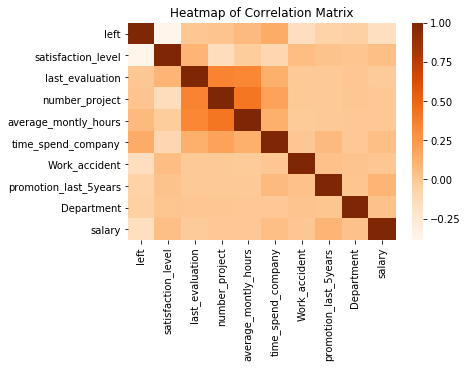

In [15]:
# Correlation Matrix
sb.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           cmap="Oranges")
plt.title('Heatmap of Correlation Matrix')

Highly correlated features:
1. (+) Project Count & Average Monthly Hours & Evaluation
2. (-) Left & Satisfaction & Salary

From the heatmap, there seems to be heavy positive(+) correlation between project count, average monthly hours, and evaluation. This could mean that the employees who spent more hours and did more projects were evaluated highly. But the feature evaluation on its own, when compared independently with the response variable left, shows little to no relationship. 

For the negative(-) relationships, left (i.e people leaving the company), satisfaction, and salary are highly correlated. We could assume that people tend to leave a company more when they are less satisfied and are lowly paid.

Now, let's take a look at some of the relationships between employees leaving the company and the other variables

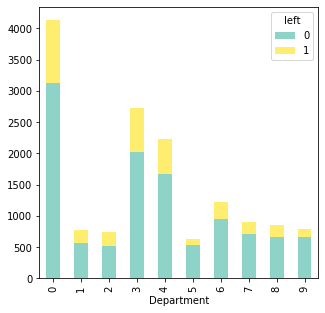

In [16]:
#Department v.s Left
clarity_color_table = pd.crosstab(index=df["Department"], 
                          columns=df["left"])

clarity_color_table.plot(kind="bar", colormap='Set3',
                 figsize=(5,5),
                 stacked=True)

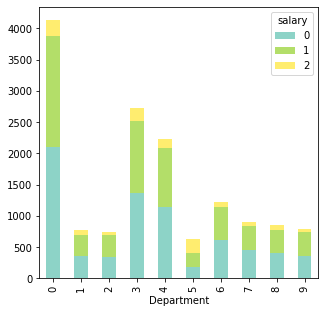

In [17]:
#Department v.s Salary
clarity_color_table = pd.crosstab(index=df["Department"], 
                          columns=df["salary"])

clarity_color_table.plot(kind="bar", colormap='Set3', 
                 figsize=(5,5),
                 stacked=True)

From the first bar plot, it seems like the top three departments for the company are support, technical, and sales. Most of the departments have similar turnover rates, but management has the lowest. This could mean that people with a higher position tend to not leave. And this is true since in the second bar plot, it can be seen that the management department has the highest salary ratio and lowest turnover rate.

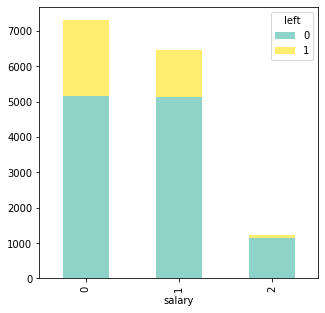

In [18]:
#Salary v.s Left
clarity_color_table = pd.crosstab(index=df["salary"], 
                          columns=df["left"])

clarity_color_table.plot(kind="bar", colormap='Set3',
                 figsize=(5,5),
                 stacked=True)

An interesting observation to be seen here. Almost all of the employees who left the company came from low to medium salary ranges. Barely anybody that had a high salary left the company.

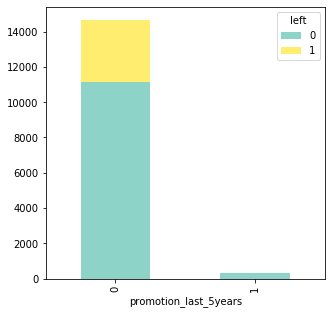

In [19]:
#Promotion v.s Left
clarity_color_table = pd.crosstab(index=df["promotion_last_5years"], 
                          columns=df["left"])

clarity_color_table.plot(kind="bar", colormap='Set3',
                 figsize=(5,5),
                 stacked=True)

It seems like most of the employees who left the company were not promoted in the last 5 years!

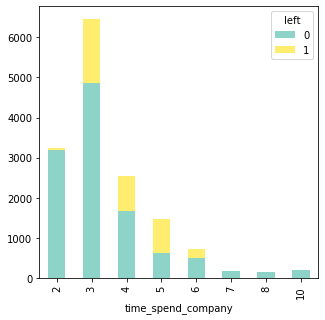

In [20]:
# No.of Years at Company v.s Left
clarity_color_table = pd.crosstab(index=df["time_spend_company"], 
                          columns=df["left"])

clarity_color_table.plot(kind="bar", colormap='Set3',
                 figsize=(5,5),
                 stacked=True)

It seems like a huge majority of the employees who left worked for about 3-6 years before leaving. Employees that worked for 7-10 years did not have anybody who left.

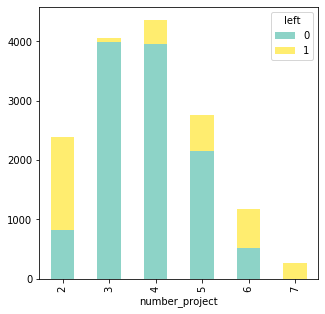

In [21]:
# No. of project v.s. Left
clarity_color_table = pd.crosstab(index=df["number_project"], 
                          columns=df["left"])

clarity_color_table.plot(kind="bar", colormap='Set3',
                 figsize=(5,5),
                 stacked=True)

There are some interesting observations to be seen here. More than half of the employees that only had 2 projects left the company. The same could be said with employees who had 6-7 projects. This could mean that employees with 2 projects or less are not valued highly enough and thus could be the reason why they left the company. In the same way, employees with 6+ projects were probably getting overworked and thus, left the company.

It looks like a majority of the employes who left only had two projects. Also, there is an increase in turnover rate as the number of projects increase. 3 Projects seems to be the sweet spot.

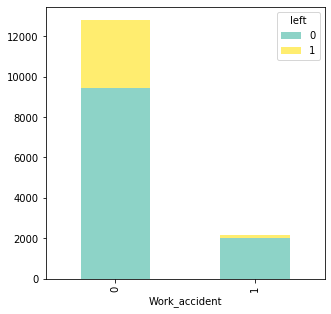

In [22]:
#Work Accident v.s Left
clarity_color_table = pd.crosstab(index=df["Work_accident"], 
                          columns=df["left"])

clarity_color_table.plot(kind="bar", colormap='Set3',
                 figsize=(5,5),
                 stacked=True)

There is an interesting observation here. Employees that had a work accident rarely left the company; majority of those who left had not had any work accidents before. This is could be probably due to the fact that those who had work accidents could claim huge insurance amounts and did not feel the need to move on from the company!

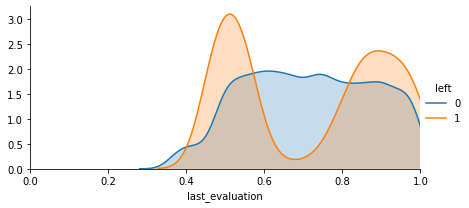

In [23]:
# Last Evaluation v.s. Left
g = sb.FacetGrid(df, hue="left",aspect=2)
g.map(sb.kdeplot,'last_evaluation',shade= True)
g.set(xlim=(0, df['last_evaluation'].max()))
g.add_legend()

There seems to be a bimodal distribution for those that had left the company. It looks like employees who performed bad or performed well left the company. The former seems reasonable since these employees might have felt that they would not be promoted due to their bad performance. However, the latter observation seems interesting - these people probably left because they may not have been happy with their work/company. 

The sweet spot seems for those that stayed seems to be within 0.6-0.8.

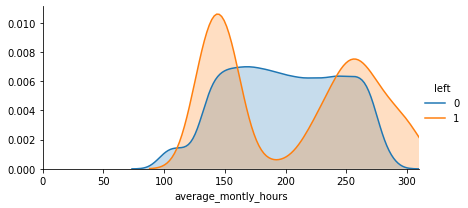

In [24]:
# Average monthly hours v.s. Left
g = sb.FacetGrid(df, hue="left",aspect=2)
g.map(sb.kdeplot,'average_montly_hours',shade= True)
g.set(xlim=(0, df['average_montly_hours'].max()))
g.add_legend()

This is another noticeable bi-modal distrubtion for employees that left the company. It looks like employees who had less hours of work (150 hours or less) and employees who had too many hours of work (250 hours or more) left the company. This means that employees who left were generally underworked or overworked.

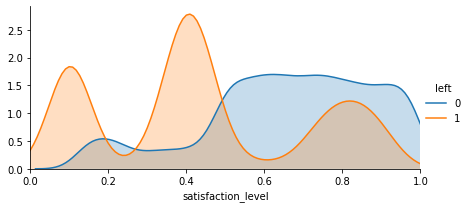

In [25]:
# Satisfaction Level v.s. Left
g = sb.FacetGrid(df, hue="left",aspect=2)
g.map(sb.kdeplot,'satisfaction_level',shade= True)
g.set(xlim=(0, df['satisfaction_level'].max()))
g.add_legend()

The plot seems to show a trimodal distribution for those who left the company. It seems that employees that had mid levels and low levels of satisfaction generally left the company. On the other hand, employees who were more satisfied tended to remain in the company.

### Following the data exploration, we would now like to use all these variables as predictors for our model

In [26]:
# Taking the relevant variables for our models
cleandf = df[['satisfaction_level', 'average_montly_hours', 'salary', 'time_spend_company','Work_accident', 'number_project', 'last_evaluation', 'promotion_last_5years', 'Department']]
cleandf.head()

,satisfaction_level,average_montly_hours,salary,time_spend_company,Work_accident,number_project,last_evaluation,promotion_last_5years,Department
0,0.38,157,0,3,0,2,0.53,0,0
1,0.80,262,1,6,0,5,0.86,0,0
2,0.11,272,1,4,0,7,0.88,0,0
3,0.72,223,0,5,0,5,0.87,0,0
4,0.37,159,0,3,0,2,0.52,0,0


In [27]:
X = cleandf
X.head()

,satisfaction_level,average_montly_hours,salary,time_spend_company,Work_accident,number_project,last_evaluation,promotion_last_5years,Department
0,0.38,157,0,3,0,2,0.53,0,0
1,0.80,262,1,6,0,5,0.86,0,0
2,0.11,272,1,4,0,7,0.88,0,0
3,0.72,223,0,5,0,5,0.87,0,0
4,0.37,159,0,3,0,2,0.52,0,0


In [28]:
y = df.left

In [29]:
# Split the Data for Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=17)

# Part 4: Modelling
### We would like to use the following techniques to model our dataset to determine which of the following models would best allow us to predict if an employee would leave or remain in the company.

    0. Decision Tree Classifier (we use it as the baseline comparison)
    1. Logistic Regression
    2. Random Forest Classifier
    3. Naive Bayes (Bernoulli and Gaussian)

### Each of the classifier will then be tested using the Confusion Matrix and the ROC Curve (AUC - Area under Curve). 

The confusion matrix allows us to measure the performance of a particular classifier with a fixed threshold. Given a set of input cases, the classifier scores each one, and score above the threshold are labelled Class 1 and scores below the threshold are labelled Class 2.

The ROC curve, on the other hand, examines the performance of a classifier without fixing the threshold. Given a set of input cases, the classifier scores each one. The ROC curve is then generated by testing every possible threshold and plotting each result as a point on the curve.

The ROC curve is especially useful because it allows us to test our classifiers over a range of sensitivities/specificities. In simple terms, sensitivity (in our context) refers to the proportion of employees that were identified correctly to have left the company (i.e. True Positive) upon the total number of employees who actually left the company. Similiarly, specificity refers to the the proportion of employees that were identified correctly to not have left the company (i.e. True Negative) upon the total number of employees who did not leave the company.

There's usually a trade off between sensitivity and specificity. When we decrease the threshold, we get more positive values thus increasing the sensitivity. Meanwhile, this will decrease the specificity. Similarly, when we increase the threshold, we get more negative values thus increasing the specificity and decreasing sensitivity. The ROC curve is plotted with sensitivity against (1-specificity); in other words, True Positive rate (TPR) against the False Positive Rate(FPR) where TPR is on y-axis and FPR is on the x-axis.

The AUC is the area under the ROC curve. Note that the ROC is a probability curve and the AUC represents degree or measure of separability. It tells how capable the model is of distinguishing between classes. Higher the AUC, better the model is at distinguishing between employees who left the company and employees who remained.

## 0. Decision Tree Classifier

In [30]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 6)

In [31]:
# Train the Model
dectree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [32]:
# Assign the trained model to a variable
y_pred = dectree.fit(X_train, y_train).predict(X_test)

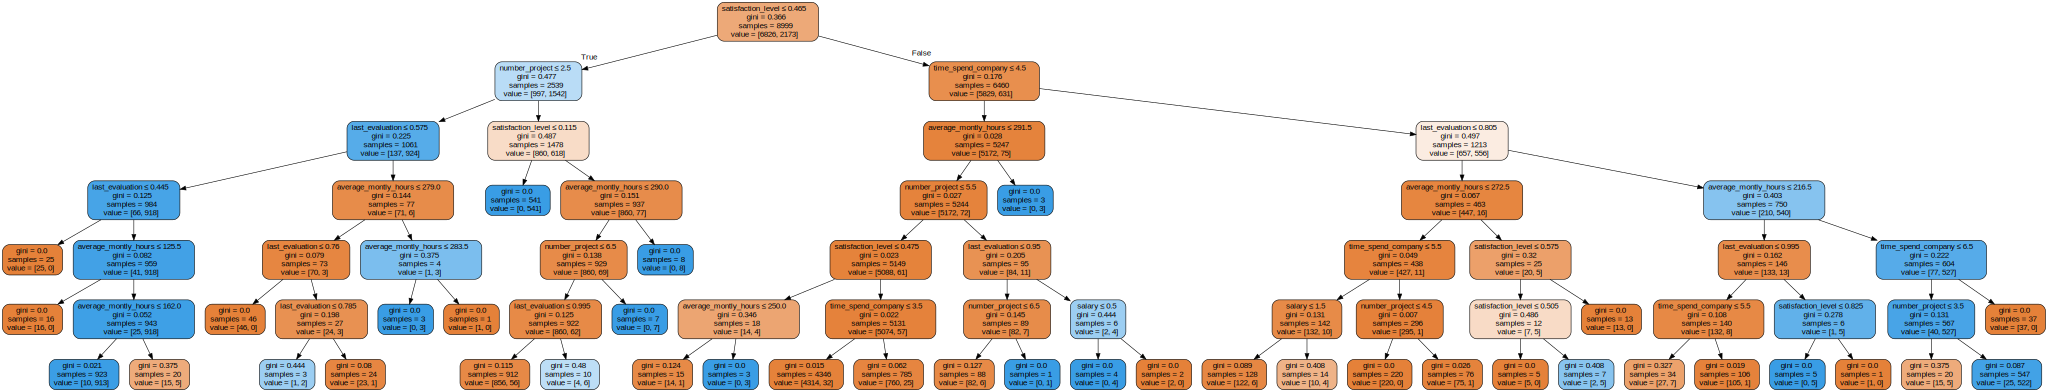

In [33]:
# Import export_graphviz from sklearn.tree
from sklearn.tree import export_graphviz

# Export the Decision Tree as a dot object
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,          # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

# Render using graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
import graphviz
graphviz.Source(treedot)

In [34]:
dectree.predict(X_test)

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [35]:
# Goodness of Fit of Decision Tree model
dectree_score = dectree.score(X_test,y_test)
dectreetrain_score = dectree.score(X_train, y_train)
print('The train accuracy for Decision Tree: ', dectreetrain_score)
print('The test accuracy for Decision Tree: ', dectree_score)

The train accuracy for Decision Tree:  0.9786642960328925
The test accuracy for Decision Tree:  0.9793333333333333


Confusion matrix, without normalization
[[4567   35]
 [  88 1310]]
Normalized confusion matrix
[[0.99 0.01]
 [0.06 0.94]]


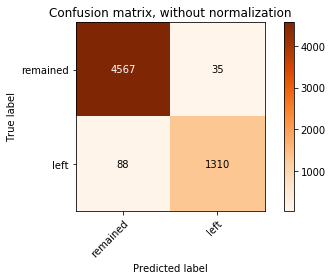

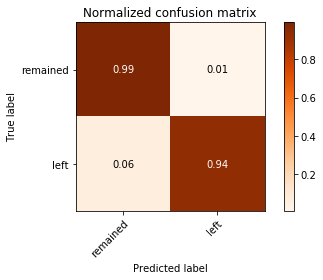

In [36]:
# Print Confusion Matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix

X = cleandf
y = df.left
class_names = cleandf.columns

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
y_pred = dectree.fit(X_train, y_train).predict(X_test)

def plot_confusion_matrix(y_train, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Oranges):

    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_train, y_pred)
    # Only use the labels that appear in the data
    classes = ['remained', 'left']
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

From the Confusion Matrix above (threshold = 0.5), we can see that Decision Tree gives us a high percentage of True Positive and True Negative, but low percentage of False Positive and False Negative. 

Therefore, the model is a good predictor.

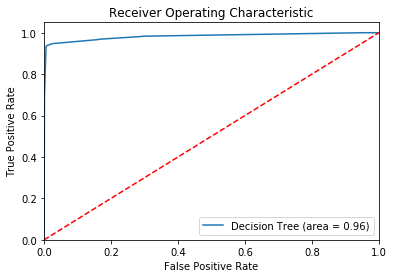

In [37]:
# Show ROC Curve which summarises all possible Confusion Matrix with Threshold between 0 and 1
# And AUC which tells us how good the model is
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
dectree_roc_auc = roc_auc_score(y_test, dectree.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dectree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dectree_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('dectree_ROC')
plt.show()

In this ROC, the AUC score is 0.96. Hence, it is a good model to do prediction.

## 1. Logistic Regression

In [38]:
# Import Library for the Model
from sklearn.linear_model import LogisticRegression
logres = LogisticRegression()

In [39]:
# Train the Model
logres.fit(X_train, y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
# Predict the Model
logres.predict(X_test)

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [41]:
# Goodness of Fit of Logistic Regression model
logres_score = logres.score(X_test,y_test)
logrestrain_score = logres.score(X_train, y_train)
print('The train accuracy for Logistic Regression: ', logrestrain_score)
print('The test accuracy for Logistic Regression: ', logres_score)

The train accuracy for Logistic Regression:  0.7814201577953106
The test accuracy for Logistic Regression:  0.7845


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion matrix, without normalization
[[4298  304]
 [ 989  409]]
Normalized confusion matrix
[[0.93 0.07]
 [0.71 0.29]]


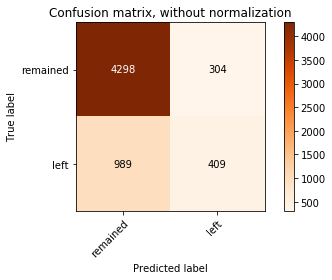

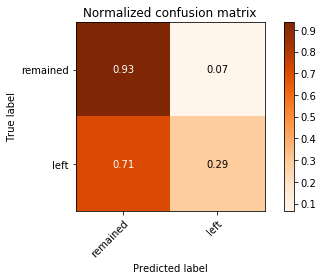

In [42]:
# Print Confusion Matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix

class_names = df.left

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
y_pred = logres.fit(X_train, y_train).predict(X_test)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = ['remained', 'left']
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

From the Confusion Matrix above (threshold = 0.5), we can see that Logistic Regression gives high percentage of True Negative, but low percentage for True Positive. It also gives high percentage of False Negative and low percentage of False Positive. 

Hence, this model is not good, as it has a relatively high chance of predicting employees who left as remained rather than as left.

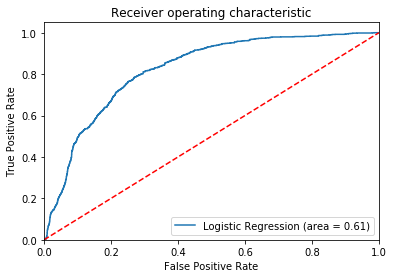

In [43]:
# Show ROC Curve which summarises all possible confusion matrix with threshold between 0 and 1
# And AUC which tells us how good the model is
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logres_roc_auc = roc_auc_score(y_test, logres.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logres.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logres_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In this ROC, the AUC score is 0.61. Hence, it is not a good model to do prediction.

## 2. Random Forest Classifier

In [44]:
# Import library to do modelling
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [45]:
# Assign trained model to a variable
y_pred = rfc.fit(X_train, y_train).predict(X_test)

In [46]:
rfc.predict(X_test)

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [47]:
# Goodness of Fit of Random Forest Classifier model
rfc_score = rfc.score(X_test,y_test)
rfctrain_score = rfc.score(X_train, y_train)
print('The train accuracy for Random Forest Classifier: ', rfctrain_score)
print('The test accuracy for Random Forest Classifier: ', rfc_score)

The train accuracy for Random Forest Classifier:  1.0
The test accuracy for Random Forest Classifier:  0.991


Confusion matrix, without normalization
[[4595    7]
 [  47 1351]]
Normalized confusion matrix
[[1.   0.  ]
 [0.03 0.97]]


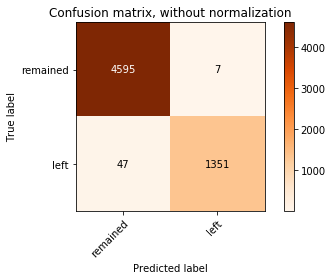

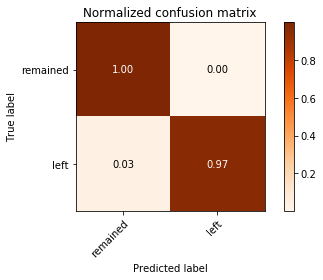

In [48]:
# Print Confusion Matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix

class_names = df.left

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
y_pred = rfc.fit(X_train, y_train).predict(X_test)

def plot_confusion_matrix(y_train, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_train, y_pred)
    # Only use the labels that appear in the data
    classes = ['remained', 'left']
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

From the Confusion Matrix above (threshold = 0.5), we can see that Random Forest Classifier gives very high percentage of True Positive and True Negative, but very low percentage of False Positive and False Negative. 

Therefore, the model is good to do prediction.

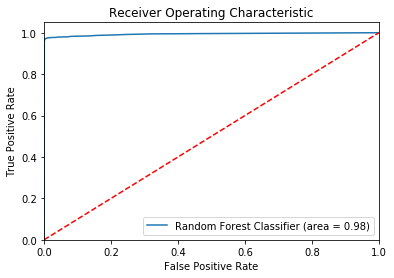

In [49]:
# Show ROC Curve which summarises all possible confusion matrix with threshold between 0 and 1
# And AUC which tells us how good is the model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rfc_roc_auc = roc_auc_score(y_test, rfc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % rfc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('rfc_ROC')
plt.show()

In this ROC, the AUC score is 0.98. Hence, it is a very precise model to do prediction; in fact, that is the highest AUC value thus far.

## 3. Naive Bayes

In [50]:
# Import library to do modelling
import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

**We would like to use 2 Naive Bayes approaches - Bernoulli and Gaussian**
    
The presence of "Naive" in the Naive Bayes model is due to the fact that this approach makes a very strong/naive assumption that the independent variables used to predict if the employee stays or remains are not dependent on one another

### a. Bernoulli

In [51]:
# Train the Data
BernNB = BernoulliNB(binarize=0.1)
BernNB.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.1, class_prior=None, fit_prior=True)

In [52]:
# Assign trained model to a variable
y_pred = BernNB.fit(X_train, y_train).predict(X_test)

In [53]:
# Goodness of Fit of Bernoulli NB model
from sklearn import metrics
BernNB_score = metrics.accuracy_score(y_test,y_pred)
BernNBtrain_score = BernNB.score(X_train, y_train)
print('The train accuracy for Bernoulli NB: ', BernNBtrain_score)
print('The test accuracy for Bernoulli NB: ', BernNB_score)

The train accuracy for Bernoulli NB:  0.7957550838982109
The test accuracy for Bernoulli NB:  0.8033333333333333


Confusion matrix, without normalization
[[4602    0]
 [1180  218]]
Normalized confusion matrix
[[1.   0.  ]
 [0.84 0.16]]


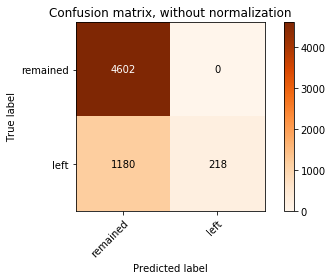

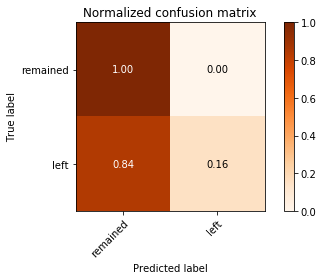

In [54]:
# Print Confusion Matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix

class_names = df.left

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
y_pred = BernNB.fit(X_train, y_train).predict(X_test)

def plot_confusion_matrix(y_train, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_train, y_pred)
    # Only use the labels that appear in the data
    classes = ['remained', 'left']
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

From the Confusion Matrix above (threshold = 0.5), we can see that Bernoulli NB gives high percentage of True Negative, but low percentage in True Positive. It also gives high percentage of False Negative and low percentage of False Positive. 

Hence, this model is not good, as it has a relatively higher chance of predicting employees who left as remained rather than as Left.

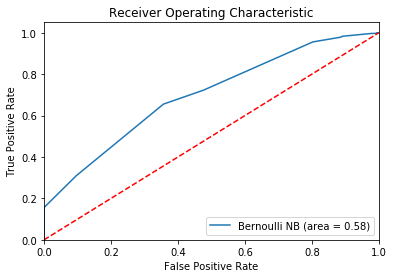

In [55]:
# Show ROC Curve which summarises all possible confusion matrix with threshold between 0 and 1
# And AUC which tells us how good is the model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
BernNB_roc_auc = roc_auc_score(y_test, BernNB.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, BernNB.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Bernoulli NB (area = %0.2f)' % BernNB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('BernNB_ROC')
plt.show()

In this ROC, the AUC score is 0.58. Hence, it is not a good model to do prediction.

### b. Gaussian

In [56]:
# Train the model 
GausNB = GaussianNB()
GausNB.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [57]:
# Assign trained model to a variable
y_pred = GausNB.fit(X_train, y_train).predict(X_test)

In [58]:
from sklearn import metrics
# Goodness of Fit of Gaussian NB model
GausNB_score = metrics.accuracy_score(y_pred,y_test)
GausNBtrain_score = GausNB.score(X_train, y_train)
print('The train accuracy for Gaussian NB: ', GausNBtrain_score)
print('The test accuracy for Gaussian NB: ', GausNB_score)

The train accuracy for Gaussian NB:  0.7758639848872096
The test accuracy for Gaussian NB:  0.7781666666666667


Confusion matrix, without normalization
[[3590 1012]
 [ 319 1079]]
Normalized confusion matrix
[[0.78 0.22]
 [0.23 0.77]]


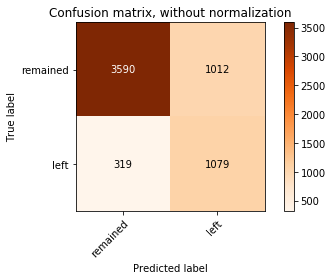

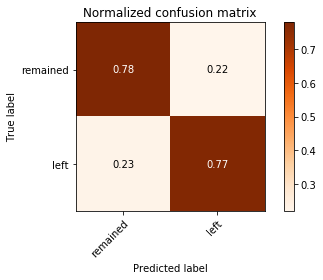

In [59]:
# Print Confusion Matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix

class_names = df.left

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
y_pred = GausNB.fit(X_train, y_train).predict(X_test)

def plot_confusion_matrix(y_train, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_train, y_pred)
    # Only use the labels that appear in the data
    classes = ['remained', 'left']
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

From the Confusion Matrix above (threshold = 0.5), we can see that Gaussian NB gives high percentage of True Positive and True Negative, but low percentage of False Positive and False Negative. 

Therefore, the model is quite a good to do prediction.

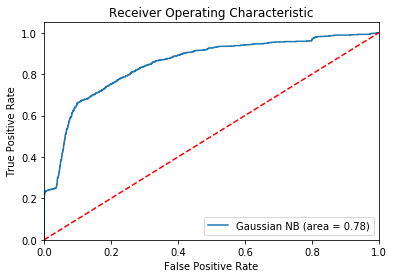

In [60]:
# Show ROC Curve which summarises all possible confusion matrix with threshold between 0 and 1
# And AUC which tells us how good is the model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
GausNB_roc_auc = roc_auc_score(y_test, GausNB.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, GausNB.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gaussian NB (area = %0.2f)' % GausNB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('GausNB_ROC')
plt.show()

In this ROC,the AUC score is 0.78. Hence, it is quite a good model to do prediction.

In [61]:
# Model comparison for Test Score
models = pd.DataFrame({
        'Model'          : ['Decision Tree','Logistic Regression', 'Bernoulli NB', 'Gaussian NB', 'Random Forest'],
        'Accuracy_Score' : [dectree_score, logres_score, BernNB_score, GausNB_score, rfc_score],
    })
models.sort_values(by='Accuracy_Score', ascending=False)

,Model,Accuracy_Score
4,Random Forest,0.991000
0,Decision Tree,0.979333
2,Bernoulli NB,0.803333
1,Logistic Regression,0.784500
3,Gaussian NB,0.778167


## From the table above, we can see that the best method to predict whether an employee is going to remain or leave is by using Random Forest Classification with 0.991 Accuracy Score.

# Part 5: Application 

## Now, let's use Random Forest Classifier to predict whether an employee is going to remain or leave the company

In [62]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [63]:
X.head()

,satisfaction_level,average_montly_hours,salary,time_spend_company,Work_accident,number_project,last_evaluation,promotion_last_5years,Department
0,0.38,157,0,3,0,2,0.53,0,0
1,0.80,262,1,6,0,5,0.86,0,0
2,0.11,272,1,4,0,7,0.88,0,0
3,0.72,223,0,5,0,5,0.87,0,0
4,0.37,159,0,3,0,2,0.52,0,0


In [64]:
employee = rfc.predict(X)
if(employee[0] == 0): 
    print("the employee will REMAIN in the company")
else:
    print("the employee will LEAVE the company")

the employee will LEAVE the company


In [65]:
employee2 = pd.DataFrame({
    'satisfaction_level': [input('Satisfaction Level (0-1): ')],
    'average_montly_hours': [input('Average Monthly Hours: ')],
    'salary': [input('Salary (0=low, 1=medium, 2=high): ')],
    'time_spend_company': [input('Time Spend in Company (in years): ')],
    'Work_accident': [input('Work Accident (0=no, 1=yes): ')],
    'number_project': [input('Number of Project: ')],
    'last_evaluation': [input('Last Evaluation: ')],
    'promotion_last_5years': [input('Promotion in the last 5 years (0=no, 1=yes): ')],
    'Department': [input('Department (0=sales, 1=accounting, 2=hr, 3=technical, 4=support, 5=management, 6=IT, 7=product_mng, 8=marketing, 9=RandD: ')]
})

employee2 = rfc.predict(employee2)

if(employee2[0] == 0):
    print("\nThis employee will REMAIN in the company")
else:
    print("\nThis employee will LEAVE the company")

Satisfaction Level (0-1): 0.21
Average Monthly Hours: 160
Salary (0=low, 1=medium, 2=high): 1
Time Spend in Company (in years): 3
Work Accident (0=no, 1=yes): 0
Number of Project: 4
Last Evaluation: 0.7
Promotion in the last 5 years (0=no, 1=yes): 1
Department (0=sales, 1=accounting, 2=hr, 3=technical, 4=support, 5=management, 6=IT, 7=product_mng, 8=marketing, 9=RandD: 8

This employee will REMAIN in the company
